# ANGOLO DI BREWSTER

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'brewster.csv'
fr = pd.read_csv(FILE)

In [2]:
V90 = np.array(fr['V90'])
sigmaV90 = np.array(fr['sigmaV90'])
teta90 = np.array(fr['teta90'])

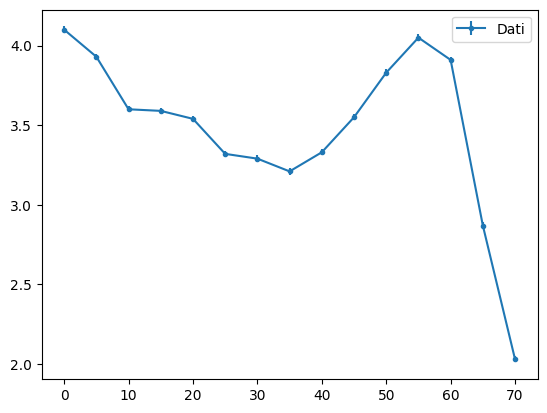

In [6]:
plt.errorbar(teta90, V90, yerr=sigmaV90, fmt='.-', label='Dati')
plt.legend()
plt.show()

TODO: raccogliere ulteriori misure dell'intorno dell'angolo di brewster, eventualmente ricavare il coeff di rifrazione del materiale, segnare il materiale, distanze, trovare coeff trasmissione e di riflessione